In [247]:
import cv2
import torch
import random
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

permutation = list(range(256))
random.shuffle(permutation)


In [340]:
# Load the image
image_path = "images/n09332890_lakeside.JPEG"  # Replace with the actual path to your image file
image = Image.open(image_path)

# Define the transformation to convert the image to a tensor
transform = transforms.ToTensor()

# Apply the transformation to the image
image_tensor = transform(image)

# Print the tensor shape and data type
print("Tensor shape:", image_tensor.shape)
print("Data type:", image_tensor.dtype)

Tensor shape: torch.Size([3, 379, 500])
Data type: torch.float32


In [341]:
image_tensor_uint8 = image_tensor*255
image_tensor_uint8 = image_tensor_uint8.to(torch.uint8)

In [342]:
def obfuscate(image_tensor,permutation):
    C,H,W=image_tensor.shape
    obfuscated_image_tensor = torch.zeros_like(image_tensor)
    for c in range(C):
        for h in range(H):
            for w in range(W):
                obfuscated_image_tensor[c][h][w] = permutation[image_tensor[c][h][w]]
    return obfuscated_image_tensor

In [343]:
obfuscated_image_tensor_uint8 = obfuscate(image_tensor_uint8,permutation)
obfuscated_image_tensor = obfuscated_image_tensor_uint8.to(torch.float32)/255

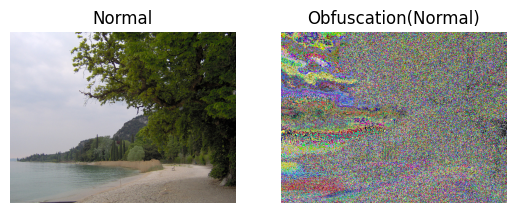

In [344]:
import torch
import matplotlib.pyplot as plt

# Assuming you have a tensor named 'image_tensor' with shape (channels, height, width)

# Convert the tensor to a NumPy array
image_array = image_tensor.numpy()
obfuscated_image_array = obfuscated_image_tensor.numpy()

# Transpose the array to match the expected shape (height, width, channels)
image_array = image_array.transpose(1, 2, 0)
obfuscated_image_array = obfuscated_image_array.transpose(1, 2, 0)
# Display the image
plt.subplot(1,2,1)
plt.imshow(image_array)
plt.title('Normal')
plt.axis('off')  # Optional: turn off axis labels
plt.subplot(1,2,2)
plt.title('Obfuscation(Normal)')
plt.imshow(obfuscated_image_array)
plt.axis('off')
plt.show()


In [345]:
import torch

def add_uniform_noise(image_tensor,a):
    C,H,W=image_tensor.shape
    noise = (((2*a)* torch.rand((C,H,W)) - a)).to(torch.int8)
    noised_image_tensor = torch.zeros_like(image_tensor)
    for c in range(C):
        for h in range(H):
            for w in range(W):
                noised_image_tensor[c][h][w] = (image_tensor[c][h][w] + noise[c][h][w])%256
    return noised_image_tensor


In [346]:
noised_5_image_tensor_uint8 = add_uniform_noise(image_tensor_uint8,5)
noised_5_image_tensor = noised_5_image_tensor_uint8.to(torch.float32)/255

In [347]:
noised_10_image_tensor_uint8 = add_uniform_noise(image_tensor_uint8,10)
noised_10_image_tensor = noised_10_image_tensor_uint8.to(torch.float32)/255

In [348]:
noised_20_image_tensor_uint8 = add_uniform_noise(image_tensor_uint8,20)
noised_20_image_tensor = noised_20_image_tensor_uint8.to(torch.float32)/255

In [ ]:
noised_40_image_tensor_uint8 = add_uniform_noise(image_tensor_uint8,40)
noised_40_image_tensor = noised_40_image_tensor_uint8.to(torch.float32)/255

In [349]:
obfuscated_noised_5_image_tensor_uint8 = obfuscate(noised_5_image_tensor_uint8,permutation)
obfuscated_noised_5_image_tensor = obfuscated_noised_5_image_tensor_uint8.to(torch.float32)/255

In [350]:
obfuscated_noised_10_image_tensor_uint8 = obfuscate(noised_10_image_tensor_uint8,permutation)
obfuscated_noised_10_image_tensor = obfuscated_noised_10_image_tensor_uint8.to(torch.float32)/255

In [351]:
obfuscated_noised_20_image_tensor_uint8 = obfuscate(noised_20_image_tensor_uint8,permutation)
obfuscated_noised_20_image_tensor = obfuscated_noised_20_image_tensor_uint8.to(torch.float32)/255

In [ ]:
obfuscated_noised_40_image_tensor_uint8 = obfuscate(noised_40_image_tensor_uint8,permutation)
obfuscated_noised_40_image_tensor = obfuscated_noised_40_image_tensor_uint8.to(torch.float32)/255

In [352]:
image_array = image_tensor.numpy()
obfuscated_image_array = obfuscated_image_tensor.numpy()
noised_5_image_array = noised_5_image_tensor.numpy()
noised_10_image_array = noised_10_image_tensor.numpy()
noised_20_image_array = noised_20_image_tensor.numpy()
noised_40_image_array = noised_40_image_tensor.numpy()
obfuscated_noised_5_image_array = obfuscated_noised_5_image_tensor.numpy()
obfuscated_noised_10_image_array = obfuscated_noised_10_image_tensor.numpy()
obfuscated_noised_20_image_array = obfuscated_noised_20_image_tensor.numpy()
obfuscated_noised_40_image_array = obfuscated_noised_40_image_tensor.numpy()

# Transpose the array to match the expected shape (height, width, channels)
image_array = image_array.transpose(1, 2, 0)
obfuscated_image_array = obfuscated_image_array.transpose(1, 2, 0)
noised_5_image_array = noised_5_image_array.transpose(1,2,0)
noised_10_image_array = noised_10_image_array.transpose(1,2,0)
noised_20_image_array = noised_20_image_array.transpose(1,2,0)
noised_40_image_array = noised_40_image_array.transpose(1,2,0)
obfuscated_noised_5_image_array = obfuscated_noised_5_image_array.transpose(1,2,0)
obfuscated_noised_10_image_array = obfuscated_noised_10_image_array.transpose(1,2,0)
obfuscated_noised_20_image_array = obfuscated_noised_20_image_array.transpose(1,2,0)
obfuscated_noised_40_image_array = obfuscated_noised_40_image_array.transpose(1,2,0)



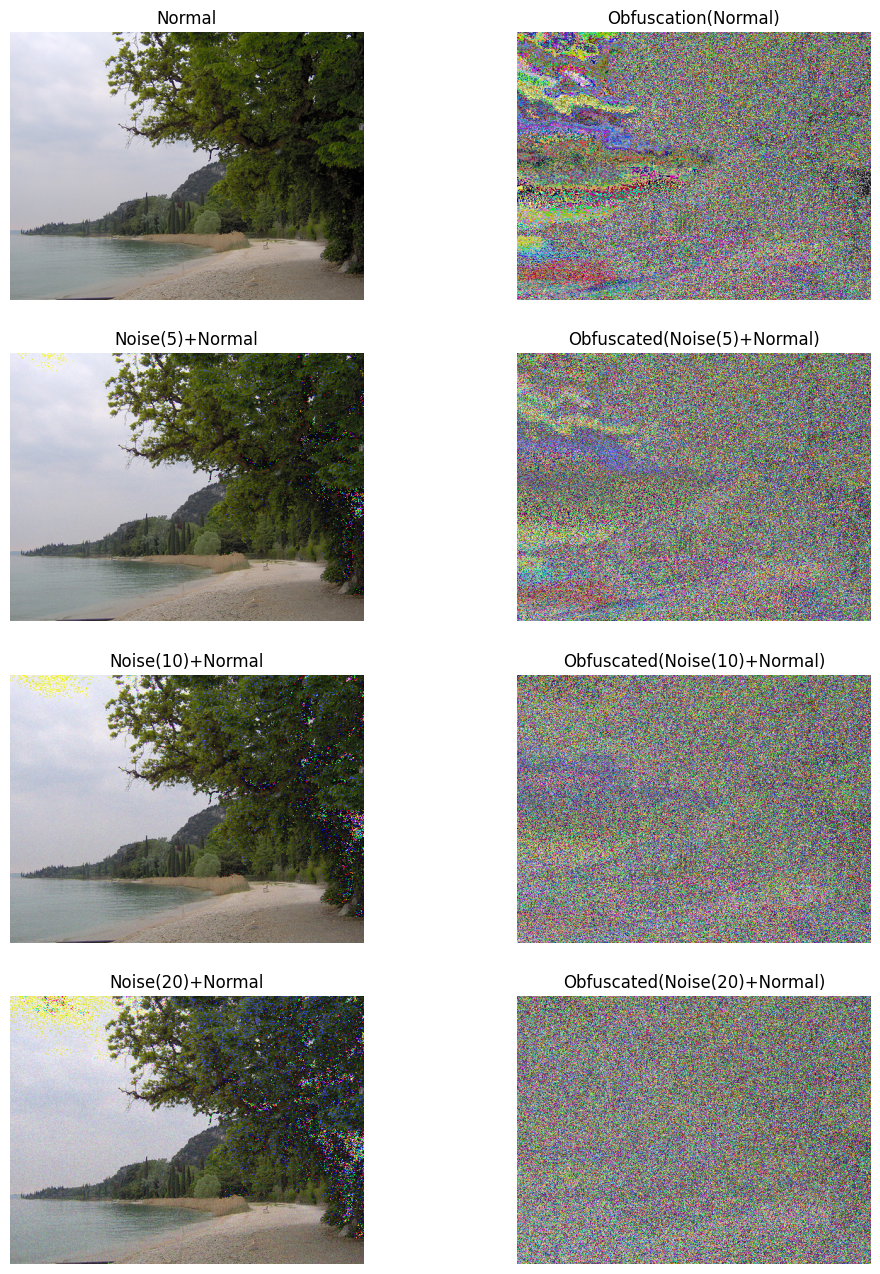

In [353]:
plt.figure(figsize=(12,20))
# Display the image
plt.subplot(5,2,1)
plt.imshow(image_array)
plt.title('Normal')
plt.axis('off')  # Optional: turn off axis labels
plt.subplot(5,2,2)
plt.title('Obfuscation(Normal)')
plt.imshow(obfuscated_image_array)
plt.axis('off')

plt.subplot(5,2,3)
plt.title('Noise(5)+Normal')
plt.imshow(noised_5_image_array)
plt.axis('off')
plt.subplot(5,2,4)
plt.title('Obfuscated(Noise(5)+Normal)')
plt.imshow(obfuscated_noised_5_image_array)
plt.axis('off')

plt.subplot(5,2,5)
plt.title('Noise(10)+Normal')
plt.imshow(noised_10_image_array)
plt.axis('off')
plt.subplot(5,2,6)
plt.title('Obfuscated(Noise(10)+Normal)')
plt.imshow(obfuscated_noised_10_image_array)
plt.axis('off')

plt.subplot(5,2,7)
plt.title('Noise(20)+Normal')
plt.imshow(noised_20_image_array)
plt.axis('off')
plt.subplot(5,2,8)
plt.title('Obfuscated(Noise(20)+Normal)')
plt.imshow(obfuscated_noised_20_image_array)
plt.axis('off')

plt.subplot(5,2,9)
plt.title('Noise(40)+Normal')
plt.imshow(noised_40_image_array)
plt.axis('off')
plt.subplot(5,2,10)
plt.title('Obfuscated(Noise(40)+Normal)')
plt.imshow(obfuscated_noised_40_image_array)
plt.axis('off')
plt.show()